<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/main/Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart Retail Data.xlsx to walmart Retail Data.xlsx


In [ ]:
!pip install pmdarima
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_excel("walmart Retail Data.xlsx")

sales_data=df[['Order Date','Sales']]
sales_data=pd.DataFrame(sales_data)
sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])
print(sales_data.head())

print(df.head())

  Order Date    Sales
0 2012-01-01   180.36
1 2012-01-01   872.48
2 2012-01-02  1239.06
3 2012-01-02   614.80
4 2012-01-02  4083.19
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   


In [ ]:
df1 = sales_data.set_index('Order Date')

monthly_sales = df1.resample('M').mean()
monthly_sales.head()

<ipython-input-20-63a23e6ca27d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df1.resample('M').mean()


,Sales
Order Date,
2012-01-31,2315.259908
2012-02-29,2187.372609
2012-03-31,2225.020157
2012-04-30,2286.491174
2012-05-31,1264.535923


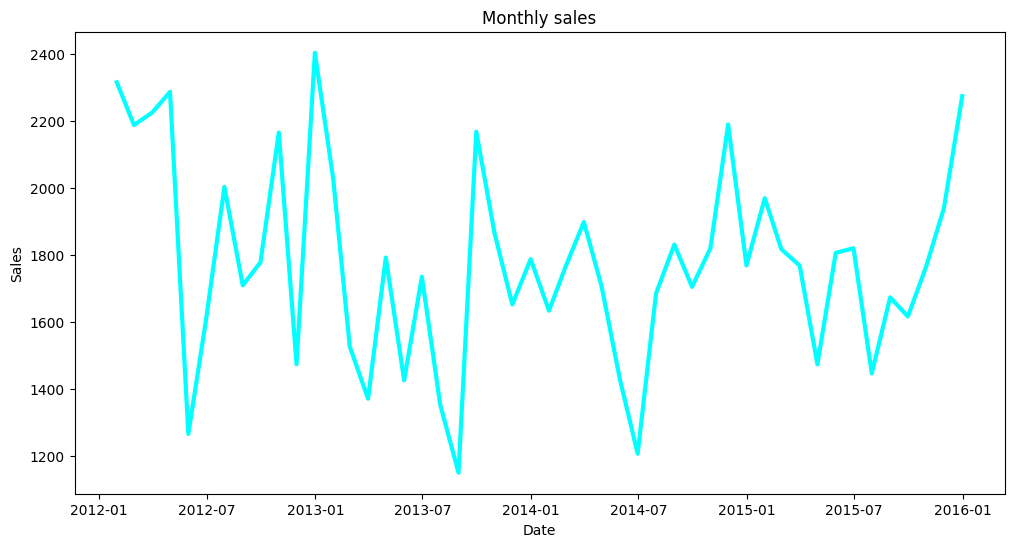

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Sales'])

ADF Statistic: -5.606134546731689
p-value: 1.2330385337321382e-06
Stationary


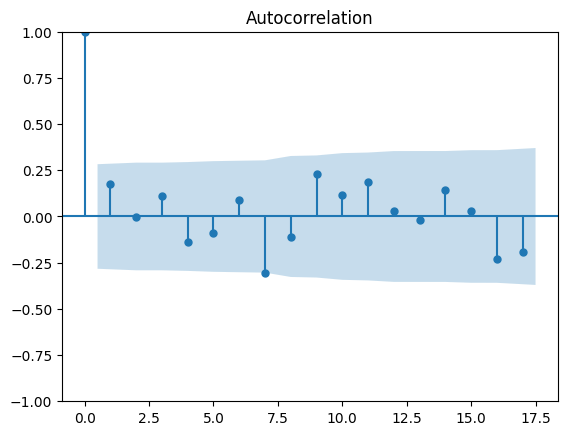

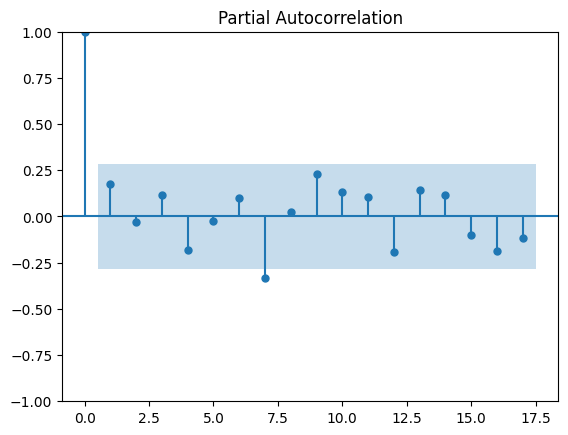

In [ ]:
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()

In [ ]:

p, d, q = 1, 0, 1
P, D, Q, s = 1, 0, 1, 12

model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


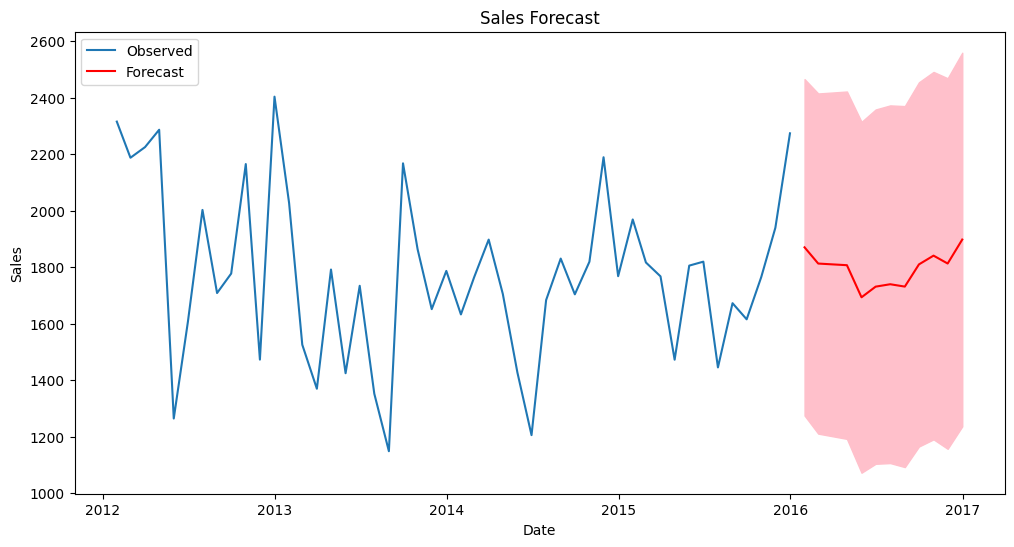

In [ ]:

forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
observed = monthly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 150.45424606056346
MSE: 36228.68831850669
